In [30]:
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [ ]:
# Veri yollarını tanımlayalım
train_dir = "C:\\Users\\Yusuf\\source\\jupyter\\dl\\images\\train"
validation_dir = "C:\\Users\\Yusuf\\source\\jupyter\\dl\\images\\validation"

In [32]:
# Veri artırma ve ölçekleme
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True
)

validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary'
)

validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(48, 48),
    batch_size=32,
    class_mode='binary'
)

Found 12102 images belonging to 2 classes.
Found 2964 images belonging to 2 classes.


In [33]:
# CNN modeli oluşturalım
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 3)),
    MaxPooling2D(2, 2),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(2, 2),
    Flatten(),
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [34]:
# Modeli eğitelim
history_augmentation = model.fit(
    train_generator,
    steps_per_epoch=300,
    epochs=50,
    validation_data=validation_generator,
    validation_steps=50
)

Epoch 1/50
300/300 [==============================] - 22s 71ms/step - loss: 0.6758 - accuracy: 0.5896 - val_loss: 0.6668 - val_accuracy: 0.5919
Epoch 2/50
300/300 [==============================] - 20s 66ms/step - loss: 0.6678 - accuracy: 0.6011 - val_loss: 0.6483 - val_accuracy: 0.6263
Epoch 3/50
300/300 [==============================] - 20s 67ms/step - loss: 0.6611 - accuracy: 0.6064 - val_loss: 0.6419 - val_accuracy: 0.6181
Epoch 4/50
300/300 [==============================] - 19s 61ms/step - loss: 0.6576 - accuracy: 0.6151 - val_loss: 0.6375 - val_accuracy: 0.6256
Epoch 5/50
300/300 [==============================] - 19s 64ms/step - loss: 0.6538 - accuracy: 0.6178 - val_loss: 0.6274 - val_accuracy: 0.6525
Epoch 6/50
300/300 [==============================] - 18s 61ms/step - loss: 0.6503 - accuracy: 0.6246 - val_loss: 0.6315 - val_accuracy: 0.6513
Epoch 7/50
300/300 [==============================] - 20s 67ms/step - loss: 0.6482 - accuracy: 0.6259 - val_loss: 0.6292 - val_accuracy:

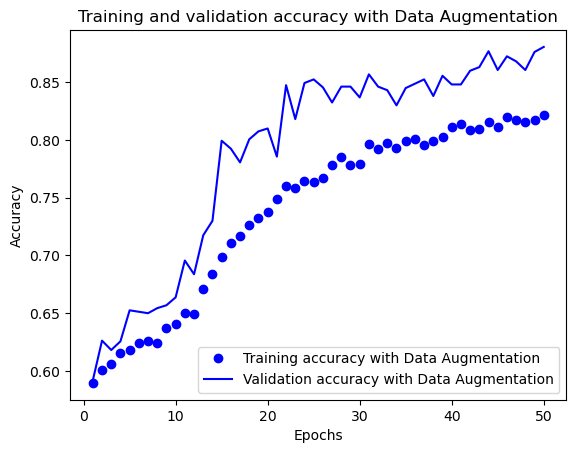

In [35]:
# Sonuçları çizdirelim
train_acc_augmentation = history_augmentation.history['accuracy']
val_acc_augmentation = history_augmentation.history['val_accuracy']
epochs_augmentation = range(1, len(train_acc_augmentation) + 1)

plt.plot(epochs_augmentation, train_acc_augmentation, 'bo', label='Training accuracy with Data Augmentation')
plt.plot(epochs_augmentation, val_acc_augmentation, 'b', label='Validation accuracy with Data Augmentation')
plt.title('Training and validation accuracy with Data Augmentation')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [7]:
# Modeli kaydedelim
model.save('model_augmentation.h5')